In [1]:
import numpy as np
import pandas as pd

In [2]:
days = 1000
n = 100
market_mat = np.random.standard_t(2, days) / 100

In [3]:
betas = np.random.uniform(0.5, 1.5, n)
alphas = np.random.uniform(0.001, -0.001, n)
noise = None

In [4]:
rets_raw = pd.DataFrame(betas).dot(pd.DataFrame(market_mat).T).T
stocks_ris = (rets_raw.add(pd.Series(alphas) + 1)).cumprod()

<AxesSubplot:>

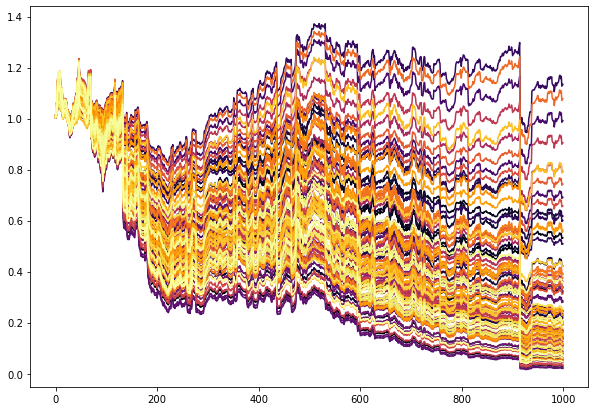

In [5]:
stocks_ris.plot(legend=False, figsize=(10, 7), cmap='inferno')

In [6]:
# OLS regression
# add constant 1 to X to have (Tx2) matrix
X = np.stack((np.ones(market_mat.shape), market_mat)).T
G_hat = np.linalg.inv(X.T @ X) @ ( X.T @ stocks_ris.pct_change().fillna(0).to_numpy())
beta_hat = G_hat[1,:].reshape(G_hat.shape[1],1)

# display the estimated CAPM coefficients
G_hat = pd.DataFrame(G_hat, index=('alphas', 'betas'))
G_hat

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
alphas,-0.000895,0.000845,-0.000743,0.000643,-0.000326,0.000200,-0.000515,0.000606,-0.000756,0.000910,...,-0.000902,-0.000571,0.000159,0.00030,0.00030,0.000059,-0.000051,0.000255,0.000496,-0.00087
betas,1.332620,1.380533,0.738257,0.987776,0.648797,0.519666,0.848386,0.948941,1.127975,0.982942,...,0.842551,0.502807,1.377952,1.48214,1.02783,1.229926,0.598181,1.027917,1.490519,1.15565


In [7]:
betas

array([1.33270908, 1.38064497, 0.73830333, 0.98785635, 0.64884133,
       0.51970673, 0.84844354, 0.94901778, 1.12804997, 0.98302481,
       1.17296741, 0.57783395, 1.06378938, 1.2214832 , 0.83290319,
       0.71608653, 0.51059648, 0.52586747, 1.2991422 , 0.75432051,
       0.81250526, 0.56900193, 0.56844858, 1.05620873, 1.07940496,
       1.48641713, 0.95272507, 1.4576705 , 1.27776982, 0.77028819,
       1.17029327, 1.4424612 , 0.50330608, 1.19223146, 1.26747784,
       0.7823791 , 1.23808453, 1.32457602, 0.95297564, 1.1164627 ,
       0.6207066 , 1.19177715, 0.66207279, 1.35680278, 0.90420259,
       0.55921687, 0.93066603, 0.83777572, 0.62622928, 0.73140566,
       0.54896094, 1.31209244, 1.37847381, 0.91108217, 1.39888711,
       1.41228453, 1.45211319, 0.84956631, 0.58815236, 0.92932771,
       0.74542504, 1.10311346, 0.51838778, 1.0177687 , 0.76680006,
       1.22553514, 0.5329517 , 1.10030928, 0.97799699, 1.4917359 ,
       0.97517628, 1.09086707, 1.0961576 , 1.1844711 , 0.79181

In [101]:
alphas * 100

array([ 0.03822037, -0.08444693, -0.00902449,  0.04035677, -0.03243501,
       -0.02286699, -0.01371688, -0.02772471, -0.05737242,  0.03888594,
        0.01698031,  0.07399033,  0.00497055, -0.07850432,  0.06230117,
       -0.02162734,  0.08996047, -0.08614048, -0.03195605,  0.04360918,
       -0.04504359,  0.01396797, -0.09023122,  0.08808032,  0.00492015,
       -0.06659402, -0.02026039, -0.01977351,  0.06292707,  0.04438568,
        0.09460556,  0.01140591, -0.00618419,  0.05295148, -0.07200078,
       -0.09135828, -0.00927737, -0.07997005,  0.07542392,  0.00940247,
       -0.0952595 ,  0.02994399,  0.02461765,  0.00499302, -0.053807  ,
       -0.08832182, -0.02981105, -0.06981677,  0.04494439, -0.08977491,
        0.09292599, -0.0257931 , -0.02183594, -0.0423245 , -0.07767058,
       -0.03130287, -0.0165607 , -0.06435235, -0.02757064, -0.08192173,
        0.04761285,  0.07284201, -0.05020299,  0.06614602,  0.03215027,
       -0.05607907, -0.0261115 , -0.09643988,  0.06584371, -0.00